# Tabular Data Science - Project

## Categorial feature selection using Chi-squared

To demonstrate the process we will see it step by step.

In [19]:
# import python pacakges
from sklearn.feature_selection import SelectKBest, chi2

In [20]:
# import our module
import categorialSelection as cs

In [21]:
THRESHOLD = 10000

###### First dataset is: Wine reviews Dataset. 

In [22]:
ds = "wine_ds.csv"
target_column_index = 4       # target column is Points

After we chose a target column we need to load the csv file.

In [23]:
print("Start working on:", ds)
X, y, features = cs.ds_loader(ds, target_column_index)

Start working on: wine_ds.csv


In [24]:
# print some info of features and scores before reduction
print("Original number of features:", X.shape[1])

Original number of features: 13


Call selectKBest package to get a score for each column, higher score means 
that column is more relevant to chosen target column

In [25]:
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)
features, scores = cs.sort_scores(selector, features)

To give the user an inforamtion about the process, program prints scores list and then display an intuitive graph to user.

In [26]:
cs.showScores(features, scores, "Original features with their scores:")

Original features with their scores:
Feature: region_2,   Score: 1777
Feature: country,   Score: 2023
Feature: taster_name,   Score: 3881
Feature: taster_twitter_handle,   Score: 10832
Feature: region_1,   Score: 26329
Feature: variety,   Score: 29683
Feature: winery,   Score: 128710
Feature: province,   Score: 143412
Feature: description,   Score: 574379
Feature: title,   Score: 1038012
Feature: price,   Score: 1292218
Feature: nan,   Score: 7273253
Feature: designation,   Score: 11642395


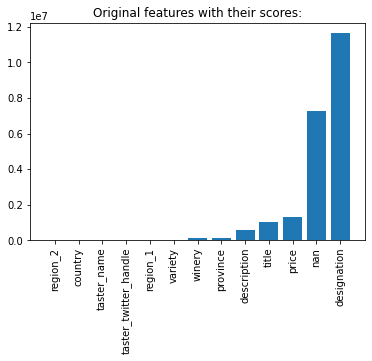

(['region_2',
  'country',
  'taster_name',
  'taster_twitter_handle',
  'region_1',
  'variety',
  'winery',
  'province',
  'description',
  'title',
  'price',
  'nan',
  'designation'],
 [1777,
  2023,
  3881,
  10832,
  26329,
  29683,
  128710,
  143412,
  574379,
  1038012,
  1292218,
  7273253,
  11642395])

In [27]:
cs.showGraph(features, scores, "Original features with their scores:")

Select only the most effective columns to be kept in the reduced data set
program need to determine a K which will represent the number of the highest scores columns we want to keep in the data set.

First function computes how many columns have score above the threshold, 
default threshold is 10000.

In [28]:
threshold_k = cs.getK_threshold(scores, threshold=THRESHOLD)

In [29]:
threshold_k

10

Second function looks for an elbow point in graph, and return K as the number of columns above the elbow point.

In [30]:
elbow_point_k = cs.getK_elbow_point(scores)

In [31]:
elbow_point_k

2

Finally program takes the minimal K from both functions and prints results to user.

In [32]:
k = min(threshold_k, elbow_point_k)
print("K chosen by elbow_point is:", elbow_point_k)
print("K chosen by threshold (" + str(THRESHOLD) + ") is:", threshold_k)
print("Minimal K is:", k)

K chosen by elbow_point is: 2
K chosen by threshold (10000) is: 10
Minimal K is: 2


After program calculated K, program reduces the data set and reduces features and scores list

In [33]:
reduced_x, selector = cs.reduce_features(X, y, k)
reduced_features = features[-k:]
reduced_scores = scores[-k:]

Display reduced features and their scores:

In [34]:
cs.showScores(reduced_features, reduced_scores, "After reduction:")

After reduction:
Feature: nan,   Score: 7273253
Feature: designation,   Score: 11642395


Display a graph of reduced features and their scores:

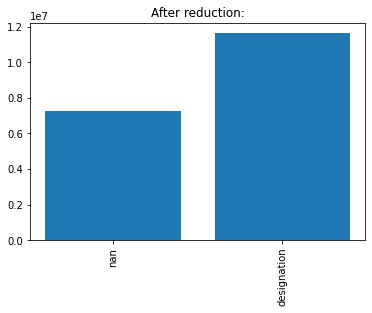

(['nan', 'designation'], [7273253, 11642395])

In [35]:
cs.showGraph(reduced_features, reduced_scores, "After reduction:")

###### Now we can see the process on three other datasets.

###### Income classification Dataset.

Start working on: income_ds.csv

Original number of features: 14
Original features with their scores:
Feature:  native-country,   Score: 14
Feature:  race,   Score: 33
Feature:  workclass,   Score: 54
Feature:  education,   Score: 301
Feature:  sex,   Score: 505
Feature:  occupation,   Score: 515
Feature:  marital-status,   Score: 1130
Feature:  education-num,   Score: 2930
Feature:  relationship,   Score: 3673
Feature:  hours-per-week,   Score: 7336
Feature: age,   Score: 15499
Feature:  capital-loss,   Score: 21906
Feature:  fnlwgt,   Score: 119726
Feature:  capital-gain,   Score: 149368


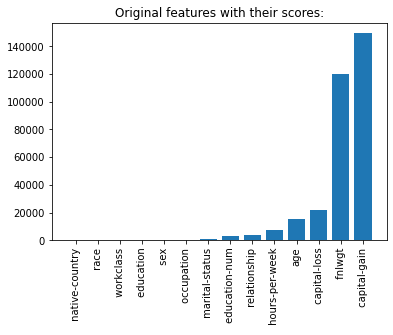


K chosen by elbow_point is: 11
K chosen by threshold (10000) is: 4
Minimal K is: 4

After reduction:
Feature: age,   Score: 15499
Feature:  capital-loss,   Score: 21906
Feature:  fnlwgt,   Score: 119726
Feature:  capital-gain,   Score: 149368


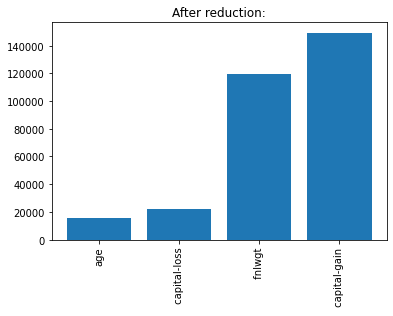

In [36]:
reduced_income = cs.chooseK("income_ds.csv", 14)            # Target column: income

###### Titanic Dataset.

Start working on: titanic_ds.csv

Original number of features: 11
Original features with their scores:
Feature: Embarked,   Score: 5
Feature: Pclass,   Score: 10
Feature: Age,   Score: 82
Feature: Name,   Score: 91
Feature: Cabin,   Score: 96
Feature: SibSp,   Score: 108
Feature: Survived,   Score: 168
Feature: Parch,   Score: 202
Feature: Ticket,   Score: 702
Feature: PassengerId,   Score: 821
Feature: Fare,   Score: 861


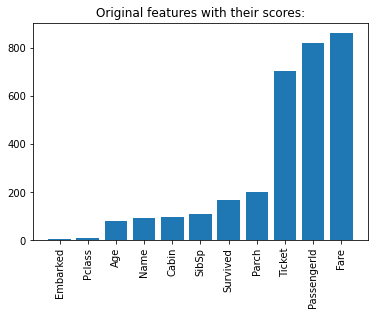


K chosen by elbow_point is: 9
K chosen by threshold (10000) is: 11
Minimal K is: 9

After reduction:
Feature: Age,   Score: 82
Feature: Name,   Score: 91
Feature: Cabin,   Score: 96
Feature: SibSp,   Score: 108
Feature: Survived,   Score: 168
Feature: Parch,   Score: 202
Feature: Ticket,   Score: 702
Feature: PassengerId,   Score: 821
Feature: Fare,   Score: 861


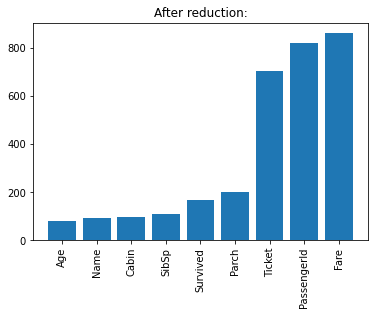

In [37]:
reduced_titanic = cs.chooseK("titanic_ds.csv", 4)            # Target column: Survived

###### Video games sales Dataset.

Start working on: video_games_ds.csv

Original number of features: 15
Original features with their scores:
Feature: Rating,   Score: 1932
Feature: Genre,   Score: 2008
Feature: Year_of_Release,   Score: 2277
Feature: Critic_Score,   Score: 3244
Feature: Platform,   Score: 3494
Feature: User_Score,   Score: 4021
Feature: Critic_Count,   Score: 23861
Feature: Publisher,   Score: 59518
Feature: User_Count,   Score: 197999
Feature: Developer,   Score: 215785
Feature: Other_Sales,   Score: 455127
Feature: JP_Sales,   Score: 654872
Feature: EU_Sales,   Score: 1171320
Feature: Name,   Score: 1233660
Feature: NA_Sales,   Score: 1452446


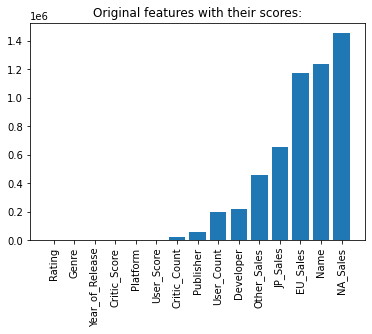


K chosen by elbow_point is: 9
K chosen by threshold (10000) is: 9
Minimal K is: 9

After reduction:
Feature: Critic_Count,   Score: 23861
Feature: Publisher,   Score: 59518
Feature: User_Count,   Score: 197999
Feature: Developer,   Score: 215785
Feature: Other_Sales,   Score: 455127
Feature: JP_Sales,   Score: 654872
Feature: EU_Sales,   Score: 1171320
Feature: Name,   Score: 1233660
Feature: NA_Sales,   Score: 1452446


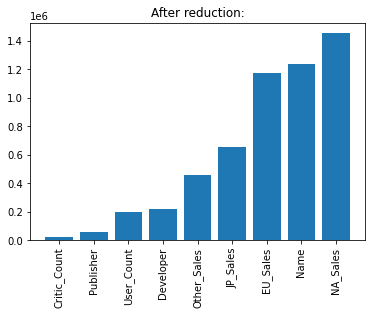

In [38]:
reduced_video_games = cs.chooseK("video_games_ds.csv", 9)        # Target column: Global_Sales